# **IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

### **Installing the latest version of scikit learn to use the pickled models**

In [ ]:
!pip install -U scikit-learn

# **LOADING THE DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/HAR KAGGLE/train.csv')
test=pd.read_csv('/content/drive/MyDrive/HAR KAGGLE/train.csv')
print("Training data:\n")
train.head()

Training data:



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

# **BASIC INFO ABOUT THE DATASET**

In [ ]:
print("Training Shape:",train.shape)
print("Testing Data Shape:",test.shape)

Training Shape: (7352, 563)
Testing Data Shape: (7352, 563)


The subject feature denotes the id of the person from whom the data was collected during the data collection experiment. Since that feature is not important we drop that feature from the dataset






In [ ]:
train.drop('subject',axis=1,inplace=True)
test.drop('subject',axis=1,inplace=True)

## **CHECK FOR NULL VALUES IF ANY**

In [ ]:
train.isnull().values.any()

False

In [ ]:
test.isnull().values.any()

False

In [ ]:
rem_cols2 = test.columns.tolist()

## **DATA TYPES OF THE FEATURES**

In [ ]:
train.dtypes.value_counts()

float64    561
object       1
dtype: int64

Except the Activity Labels feature all other features are of float data type

In [ ]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.842188,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001

We could see that from the mean values section that all features have a maximum value of 1

In [ ]:
object_feature = train.dtypes == np.object
object_feature = train.columns[object_feature]
object_feature

Index(['Activity'], dtype='object')

## **DISTRIBUTION OF THE CLASS LABELS** 

In [ ]:
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

## **CORRELATION BETWEEN INPUT FEATURES**

In [ ]:
corr_train=train.drop('Activity',axis=1)
train_corr=corr_train.corr()

# **EDA**

In [ ]:
features_to_be_plotted=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z','tGravityAcc-mean()-X','tGravityAcc-mean()-Y','tGravityAcc-mean()-Z','tBodyGyro-mean()-X','tBodyGyro-mean()-Y','tBodyGyro-mean()-Z']

In [ ]:
activities=list(train['Activity'].unique())
classwiselist=[]
for i in activities:
  classwiselist.append(train[train['Activity']==i])

## **STANDING**

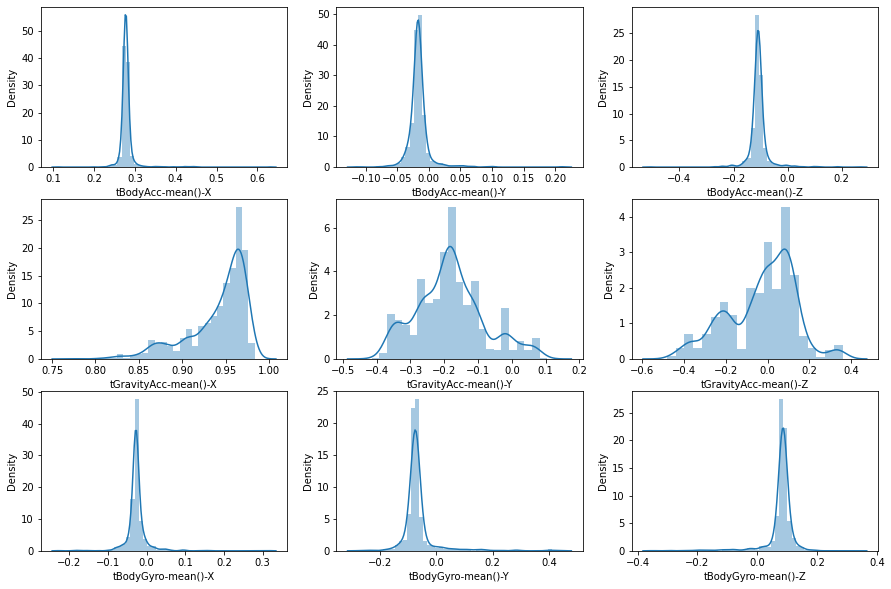

In [ ]:
standing=classwiselist[0]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(0,9):
  # plt.title(df.columns[i])
  sns.distplot(standing[features_to_be_plotted[i]],ax=ax[int((i)/3),j])
  j+=1
  if(j==3):
    j=0

## **SITTING**

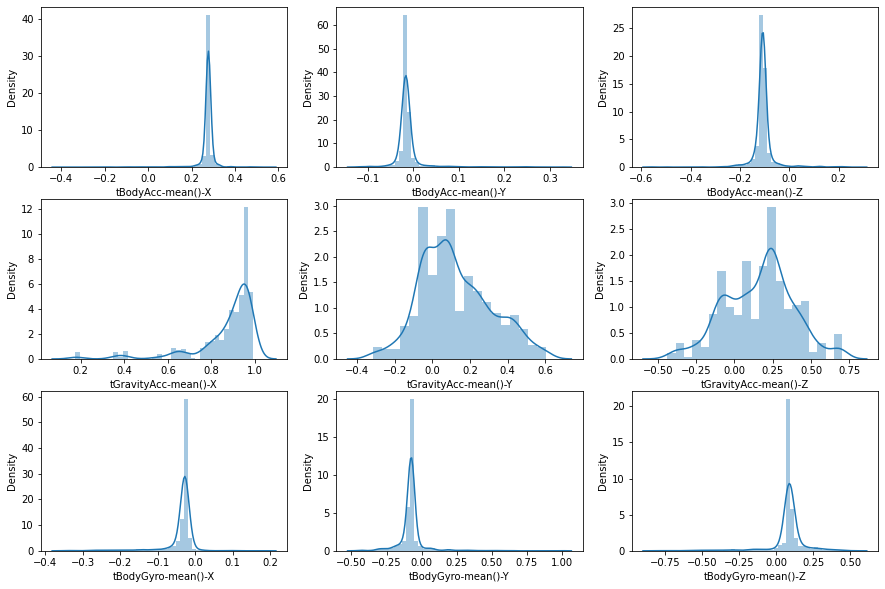

In [ ]:
sitting=classwiselist[1]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(0,9):
  # plt.title(df.columns[i])
  sns.distplot(sitting[features_to_be_plotted[i]],ax=ax[int((i)/3),j])
  j+=1
  if(j==3):
    j=0

## **LAYING**

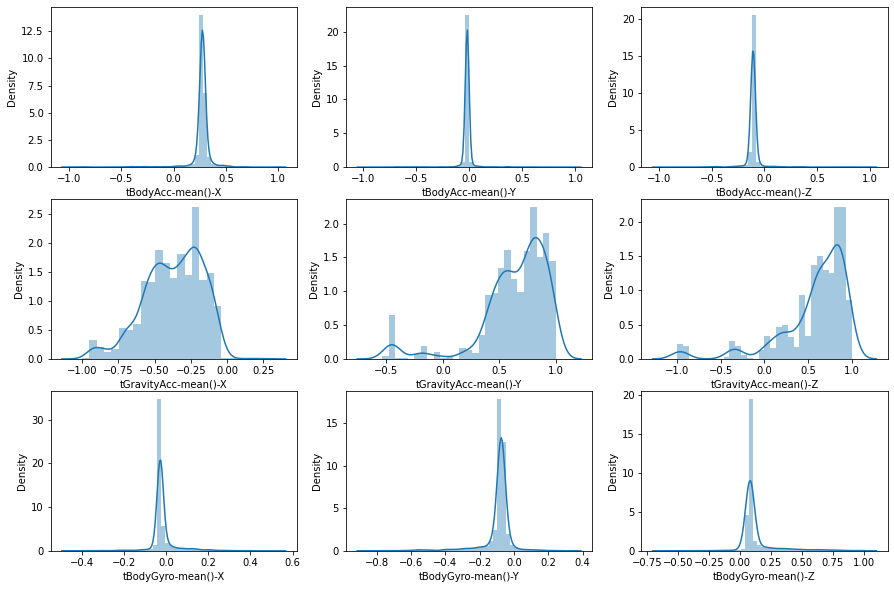

In [ ]:
sitting=classwiselist[2]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(0,9):
  # plt.title(df.columns[i])
  sns.distplot(sitting[features_to_be_plotted[i]],ax=ax[int((i)/3),j])
  j+=1
  if(j==3):
    j=0

## **WALKING**

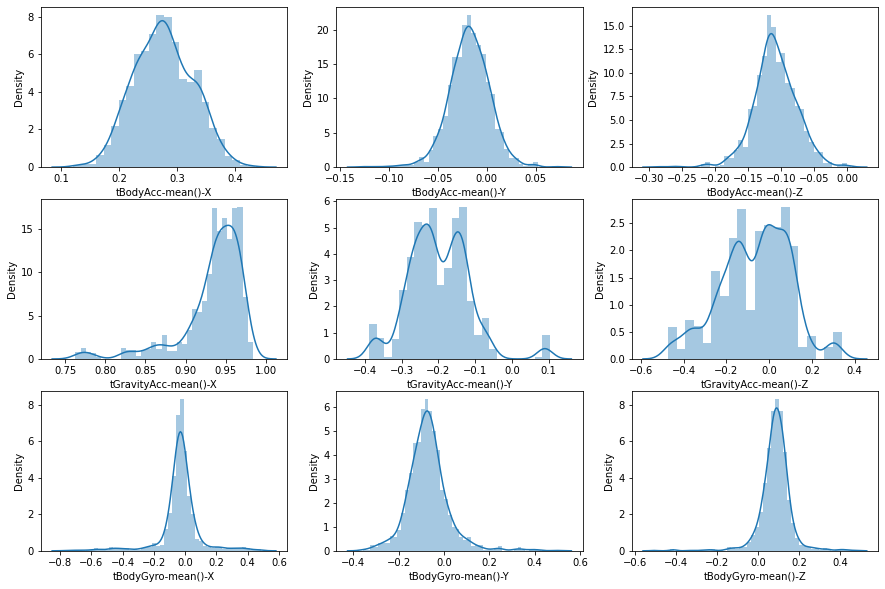

In [ ]:
walking=classwiselist[3]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(0,9):
  # plt.title(df.columns[i])
  sns.distplot(walking[features_to_be_plotted[i]],ax=ax[int((i)/3),j])
  j+=1
  if(j==3):
    j=0

## **WALKING DOWNSTAIRS**

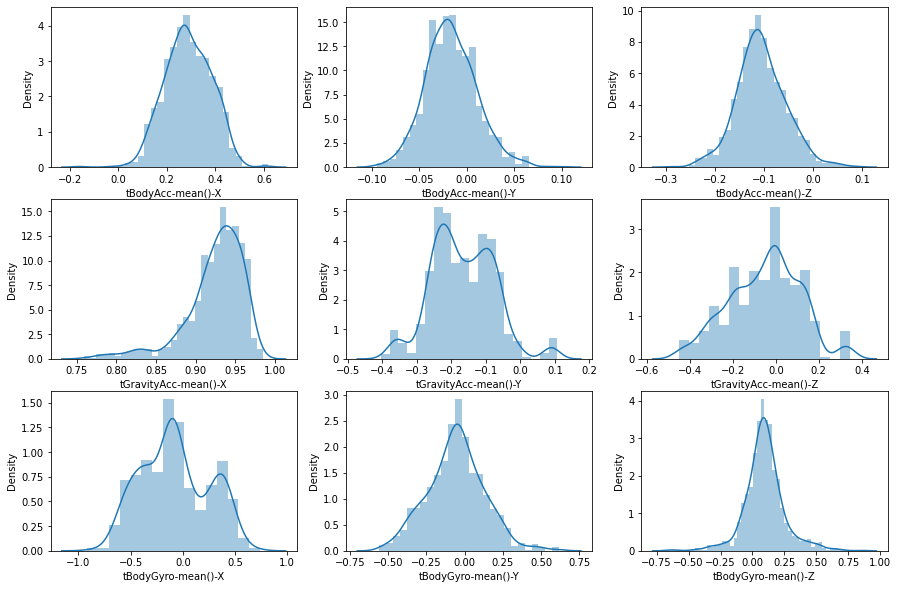

In [ ]:
walking_downstairs=classwiselist[4]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(0,9):
  # plt.title(df.columns[i])
  sns.distplot(walking_downstairs[features_to_be_plotted[i]],ax=ax[int((i)/3),j])
  j+=1
  if(j==3):
    j=0

## **WALKING UPSTAIRS**

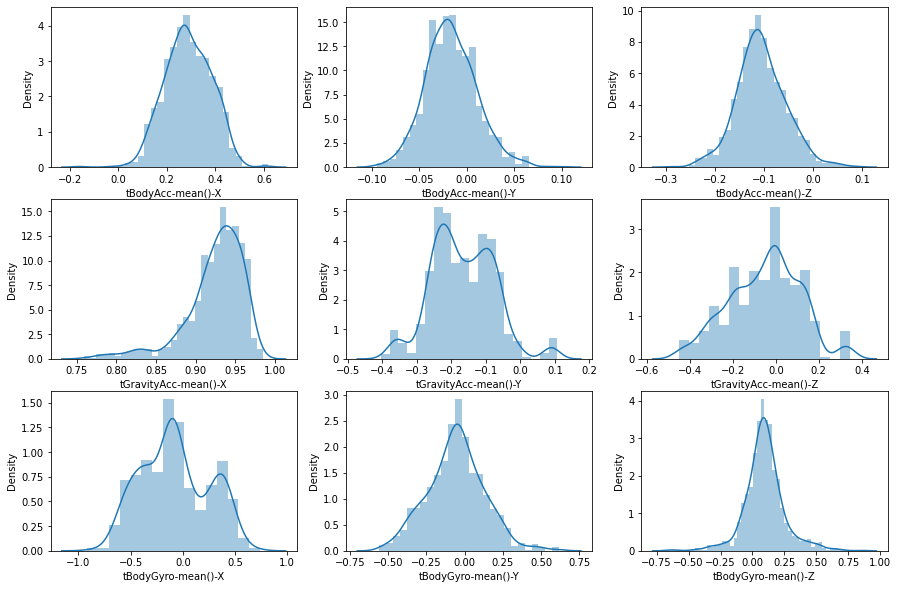

In [ ]:
walking_upstairs=classwiselist[4]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(0,9):
  # plt.title(df.columns[i])
  sns.distplot(walking_upstairs[features_to_be_plotted[i]],ax=ax[int((i)/3),j])
  j+=1
  if(j==3):
    j=0

# **FEATURE PREPROCESSING**

In [ ]:
feature_that_cannot_be_calc=[]
patterns=["energy","entropy","arCoeff","sma","Jerk","fB","angle"]
for i in train.columns:
  for j in patterns:
    if j in i:
      feature_that_cannot_be_calc.append(i)
      break

In [ ]:
len(feature_that_cannot_be_calc)
new_train=train.drop(feature_that_cannot_be_calc,axis=1)
new_test=test.drop(feature_that_cannot_be_calc,axis=1)

In [ ]:
new_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,"tGravityAcc-correlation()-X,Y",...,tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,"tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyAccMag-mean(),tBodyAccMag-std(),tBodyAccMag-mad(),tBodyAccMag-max(),tBodyAccMag-min(),tBodyAccMag-iqr(),tGravityAccMag-mean(),tGravityAccMag-std(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-min(),tGravityAccMag-iqr(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroMag-max(),tBodyGyroMag-min(),tBodyGyroMag-iqr(),Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.994231,-0.987614,-0.943220,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.984325,-0.988849,-0.917743,0.570222,...,-0.006101,-0.031365,0.107725,-0.985310,-0.976623,-0.992205,-0.984586,-0.976353,-0.992362,-0.867044,-0.933786,-0.747566,0.847308,0.914895,0.830841,-0.983438,-0.978614,-0.992966,0.709584,0.134873,0.301099,-0.959434,-0.950551,-0.957993,-0.946305,-0.992556,-0.957637,-0.959434,-0.950551,-0.957993,-0.946305,-0.992556,-0.957637,-0.968959,-0.964335,-0.957245,-0.975060,-0.991554,-0.949766,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.999150,-0.977866,-0.948225,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.999188,-0.990029,-0.941685,-0.831284,...,-0.016112,-0.083894,0.100584,-0.983120,-0.989046,-0.989121,-0.986890,-0.989038,-0.989185,-0.864904,-0.953560,-0.745870,0.833721,0.908110,0.828935,-0.992833,-0.989345,-0.990240,0.046721,-0.256929,0.169395,-0.979289,-0.976057,-0.978247,-0.978711,-0.995333,-0.981248,-0.979289,-0.976057,-0.978247,-0.978711,-0.995333,-0.981248,-0.980683,-0.983754,-0.982003,-0.984715,-0.991554,-0.982857,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.997130,-0.964810,-0.974675,-0.124698,-0.181105,0.608900,0.966878,-0.142010,0.101884,-0.999574,-0.992866,-0.992917,-0.999635,-0.992605,-0.992934,0.892401,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.999679,-0.992104,-0.992619,-0.181090,...,-0.031698,-0.102335,0.096127,-0.976292,-0.993552,-0.986379,-0.974922,-0.994122,-0.985786,-0.864904,-0.959049,-0.743277,0.833721,0.905753,0.828935,-0.972354,-0.995144,-0.986831,-0.010130,0.043312,-0.350646,-0.983703,-0.988020,-0.988327,-0.986496,-0.995333,-0.985767,-0.983703,-0.988020,-0.988327,-0.986496,-0.995333,-0.985767,-0.976317,-0.986051,-0.984458,-0.984715,-0.966193,-0.983454,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.99

In [ ]:
new_train[new_train['Activity']=='SITTING']

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,"tGravityAcc-correlation()-X,Y",...,tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,"tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyAccMag-mean(),tBodyAccMag-std(),tBodyAccMag-mad(),tBodyAccMag-max(),tBodyAccMag-min(),tBodyAccMag-iqr(),tGravityAccMag-mean(),tGravityAccMag-std(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-min(),tGravityAccMag-iqr(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroMag-max(),tBodyGyroMag-min(),tBodyGyroMag-iqr(),Activity
27,0.144504,0.189263,0.062769,-0.904300,-0.181937,-0.443151,-0.901100,-0.110813,-0.400599,-0.931896,0.042099,-0.336526,0.716476,0.655813,0.808986,-0.897128,-0.158625,-0.401964,-0.990843,-0.950335,0.985945,0.874099,0.042479,0.333094,-0.814189,-0.254616,-0.342443,-0.807029,-0.249062,-0.354958,0.860533,0.151581,0.406883,0.849573,-0.197543,0.113020,-0.783023,-0.249299,-0.441092,-0.985175,...,-0.046490,-0.282898,0.229484,-0.973356,-0.972203,-0.917199,-0.980150,-0.978611,-0.940881,-0.856909,-0.947483,-0.694184,0.824931,0.865065,0.757065,-0.994945,-0.980581,-0.973209,0.610399,-0.885549,-0.631152,-0.554369,-0.187172,-0.207301,-0.468307,-0.874139,-0.266585,-0.554369,-0.187172,-0.207301,-0.468307,-0.874139,-0.266585,-0.873880,-0.969768,-0.970756,-0.938372,-0.811146,-0.975844,SITTING
28,0.287252,-0.037455,-0.145974,-0.982915,-0.891605,-0.941438,-0.984418,-0.891373,-0.933361,-0.931896,-0.499537,-0.824700,0.826366,0.655813,0.808986,-0.986746,-0.908515,-0.920035,-0.929313,-0.299808,0.438985,0.835664,0.160675,0.399822,-0.960388,-0.896113,-0.910882,-0.966222,-0.905459,-0.908380,0.790631,0.151581,0.406883,0.849573,0.121290,0.384258,-0.973977,-0.915515,-0.901035,-0.958343,...,-0.048408,-0.239174,0.247050,-0.994226,-0.975368,-0.968880,-0.994065,-0.974314,-0.966261,-0.893364,-0.969705,-0.694184,0.834267,0.879301,0.857622,-0.993250,-0.968090,-0.968510,0.841329,-0.803092,-0.924112,-0.934594,-0.931954,-0.932545,-0.945542,-0.983313,-0.910469,-0.934594,-0.931954,-0.932545,-0.945542,-0.983313,-0.910469,-0.895203,-0.952745,-0.942232,-0.954958,-0.822564,-0.931268,SITTING
29,0.279998,-0.019484,-0.105724,-0.992818,-0.940350,-0.981493,-0.993092,-0.936927,-0.980669,-0.935389,-0.565255,-0.822532,0.847725,0.662741,0.837609,-0.992338,-0.954920,-0.980903,-0.838244,-0.714009,0.735456,0.836960,0.151877,0.386468,-0.982639,-0.946424,-0.964400,-0.983501,-0.950260,-0.970293,0.766022,0.146081,0.391429,0.850499,0.167701,0.384258,-0.987119,-0.963663,-0.984288,-0.998856,...,-0.039412,-0.166748,0.183019,-0.995644,-0.978231,-0.966640,-0.995499,-0.977069,-0.965960,-0.890293,-0.964412,-0.702119,0.839989,0.891858,0.846443,-0.994748,-0.978339,-0.969593,0.849325,-0.852237,-0.984051,-0.976995,-0.971060,-0.976285,-0.970329,-0.983313,-0.988682,-0.976995,-0.971060,-0.976285,-0.970329,-0.983313,-0.988682,-0.940966,-0.954165,-0.945935,-0.965337,-0.909261,-0.945301,SITTING
30,0.221847,0.034108,-0.123612,-0.814708,-0.749418,-0.571899,-0.878682,

## **LABEL ENCODE THE ACTIVITIES**

In [ ]:
le = LabelEncoder()
activity=train['Activity'].copy()
for x in [train, test]:
    le.fit(x['Activity'])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    x['Activity'] = le.fit_transform(x.Activity)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}
{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


## **SPLITTING THE PREDICTOR AND TARGET VARIABLES**

In [ ]:
X_train=new_train.drop('Activity',axis=1)
y_train=new_train['Activity']
X_test=new_test.drop('Activity',axis=1)
y_test=new_test['Activity']

In [ ]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,"tGravityAcc-correlation()-X,Y",...,"tGravityAcc-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,"tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyAccMag-mean(),tBodyAccMag-std(),tBodyAccMag-mad(),tBodyAccMag-max(),tBodyAccMag-min(),tBodyAccMag-iqr(),tGravityAccMag-mean(),tGravityAccMag-std(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-min(),tGravityAccMag-iqr(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroMag-max(),tBodyGyroMag-min(),tBodyGyroMag-iqr()
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.994231,-0.987614,-0.943220,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.984325,-0.988849,-0.917743,0.570222,...,0.986913,-0.006101,-0.031365,0.107725,-0.985310,-0.976623,-0.992205,-0.984586,-0.976353,-0.992362,-0.867044,-0.933786,-0.747566,0.847308,0.914895,0.830841,-0.983438,-0.978614,-0.992966,0.709584,0.134873,0.301099,-0.959434,-0.950551,-0.957993,-0.946305,-0.992556,-0.957637,-0.959434,-0.950551,-0.957993,-0.946305,-0.992556,-0.957637,-0.968959,-0.964335,-0.957245,-0.975060,-0.991554,-0.949766
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.999150,-0.977866,-0.948225,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.999188,-0.990029,-0.941685,-0.831284,...,0.974386,-0.016112,-0.083894,0.100584,-0.983120,-0.989046,-0.989121,-0.986890,-0.989038,-0.989185,-0.864904,-0.953560,-0.745870,0.833721,0.908110,0.828935,-0.992833,-0.989345,-0.990240,0.046721,-0.256929,0.169395,-0.979289,-0.976057,-0.978247,-0.978711,-0.995333,-0.981248,-0.979289,-0.976057,-0.978247,-0.978711,-0.995333,-0.981248,-0.980683,-0.983754,-0.982003,-0.984715,-0.991554,-0.982857
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.997130,-0.964810,-0.974675,-0.124698,-0.181105,0.608900,0.966878,-0.142010,0.101884,-0.999574,-0.992866,-0.992917,-0.999635,-0.992605,-0.992934,0.892401,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.999679,-0.992104,-0.992619,-0.181090,...,0.643417,-0.031698,-0.102335,0.096127,-0.976292,-0.993552,-0.986379,-0.974922,-0.994122,-0.985786,-0.864904,-0.959049,-0.743277,0.833721,0.905753,0.828935,-0.972354,-0.995144,-0.986831,-0.010130,0.043312,-0.350646,-0.983703,-0.988020,-0.988327,-0.986496,-0.995333,-0.985767,-0.983703,-0.988020,-0.988327,-0.986496,-0.995333,-0.985767,-0.976317,-0.986051,-0.984458,-0.984715,-0.966193,-0.983454
3,0.279174,-0.026201,-0.123283,-0.996091,-0

In [ ]:
X_train.shape

(7352, 81)

In [ ]:
X=X_train
y=y_train

# **MODEL BUILDING**

In [ ]:
accuracy_models=[]

## **LOGISTIC REGRESSION**

In [ ]:
accuracylist=[]
kfold=KFold(n_splits=5,random_state=0,shuffle=True)
lr=LogisticRegression()
fold_count=0
for train_index, test_index in kfold.split(X):
    fold_count+=1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    accuracylist.append(accuracy_score(y_test, yhat))
    print("FOLD :-- ",fold_count)
    print("*********************************************************************************************")
    print('Accuracy: %.3f' % accuracy_score(y_test, yhat))
    print("*********************************************************************************************")
print("\n\nAverage Accuracy Score: ",np.mean(np.array(accuracylist)))

FOLD :--  1
*********************************************************************************************
Accuracy: 0.935
*********************************************************************************************
FOLD :--  2
*********************************************************************************************
Accuracy: 0.935
*********************************************************************************************
FOLD :--  3
*********************************************************************************************
Accuracy: 0.925
*********************************************************************************************
FOLD :--  4
*********************************************************************************************
Accuracy: 0.942
*********************************************************************************************
FOLD :--  5
*********************************************************************************************
Accuracy: 0.933
**************

In [ ]:
parameters = {'penalty':('l2', 'l1'), 'C':(0.01,0.1,1,10)}
lr=LogisticRegression()
clf = GridSearchCV(lr, parameters,cv=5,n_jobs=-1)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(clf.best_estimator_)
print(clf.best_score_)

LogisticRegression(C=10)
0.8920462492558621


In [ ]:
print("\tLOGISTIC REGRESSION\n")
print("Accuracy Score: ",accuracy_score(pred,y_test))
accuracy_models.append(accuracy_score(pred,y_test))

	LOGISTIC REGRESSION

Accuracy Score:  0.9428571428571428


In [ ]:
import pickle
lrmodel=open('lrmodel.pkl', 'wb')
pickle.dump(lr, lrmodel)

## **KNN CLASSIFIER**

In [ ]:
accuracylist=[]
kfold=KFold(n_splits=5,random_state=0,shuffle=True)
knn=KNeighborsClassifier()
fold_count=0
for train_index, test_index in kfold.split(X):
    fold_count+=1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    accuracylist.append(accuracy_score(y_test, yhat))
    print("FOLD :-- ",fold_count)
    print("*********************************************************************************************")
    print('Accuracy: %.3f' % accuracy_score(y_test, yhat))
    print("*********************************************************************************************")
print("\n\nAverage Accuracy Score: ",np.mean(np.array(accuracylist)))

FOLD :--  1
*********************************************************************************************
Accuracy: 0.925
*********************************************************************************************
FOLD :--  2
*********************************************************************************************
Accuracy: 0.931
*********************************************************************************************
FOLD :--  3
*********************************************************************************************
Accuracy: 0.939
*********************************************************************************************
FOLD :--  4
*********************************************************************************************
Accuracy: 0.935
*********************************************************************************************
FOLD :--  5
*********************************************************************************************
Accuracy: 0.937
**************

In [ ]:
parameters = {'n_neighbors':(3,5,7,9,11,13,15,17)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,cv=5,n_jobs=-1)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(clf.best_estimator_)
print(clf.best_score_)

KNeighborsClassifier(n_neighbors=7)
0.8405335541183337


In [ ]:
print("\tKNN Classifier\n")
print("Accuracy Score: ",accuracy_score(pred,y_test))
accuracy_models.append(accuracy_score(pred,y_test))

	KNN Classifier

Accuracy Score:  0.9319727891156463


## **DECISION TREE CLASSIFIER**

In [ ]:
accuracylist=[]
kfold=KFold(n_splits=5,random_state=0,shuffle=True)
dclf=DecisionTreeClassifier()
fold_count=0
for train_index, test_index in kfold.split(X):
    fold_count+=1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    dclf.fit(X_train, y_train)
    yhat = dclf.predict(X_test)
    accuracylist.append(accuracy_score(y_test, yhat))
    print("FOLD :-- ",fold_count)
    print("*********************************************************************************************")
    print('Accuracy: %.3f' % accuracy_score(y_test, yhat))
    print("*********************************************************************************************")
print("\n\nAverage Accuracy Score: ",np.mean(np.array(accuracylist)))

FOLD :--  1
*********************************************************************************************
Accuracy: 0.932
*********************************************************************************************
FOLD :--  2
*********************************************************************************************
Accuracy: 0.950
*********************************************************************************************
FOLD :--  3
*********************************************************************************************
Accuracy: 0.945
*********************************************************************************************
FOLD :--  4
*********************************************************************************************
Accuracy: 0.943
*********************************************************************************************
FOLD :--  5
*********************************************************************************************
Accuracy: 0.917
**************

In [ ]:
parameters = {'max_depth': [None,2,5,10,15],'min_samples_split':[2,5,10,15,20]}
dclf=DecisionTreeClassifier()
clf = GridSearchCV(dclf, parameters,cv=5,n_jobs=-1)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(clf.best_estimator_)
print(clf.best_score_)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)
0.8320206162328994


In [ ]:
print("\tDecision Tree Classifier\n")
print("Accuracy Score: ",accuracy_score(pred,y_test))
accuracy_models.append(accuracy_score(pred,y_test))

	Decision Tree Classifier

Accuracy Score:  0.9183673469387755


## **RANDOM FOREST CLASSIFIER**

In [ ]:
accuracylist=[]
kfold=KFold(n_splits=5,random_state=0,shuffle=True)
rdclf=RandomForestClassifier()
fold_count=0
for train_index, test_index in kfold.split(X):
    fold_count+=1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    rdclf.fit(X_train, y_train)
    yhat = rdclf.predict(X_test)
    accuracylist.append(accuracy_score(y_test, yhat))
    print("FOLD :-- ",fold_count)
    print("*********************************************************************************************")
    print('Accuracy: %.3f' % accuracy_score(y_test, yhat))
    print("*********************************************************************************************")
print("\n\nAverage Accuracy Score: ",np.mean(np.array(accuracylist)))

FOLD :--  1
*********************************************************************************************
Accuracy: 0.976
*********************************************************************************************
FOLD :--  2
*********************************************************************************************
Accuracy: 0.975
*********************************************************************************************
FOLD :--  3
*********************************************************************************************
Accuracy: 0.971
*********************************************************************************************
FOLD :--  4
*********************************************************************************************
Accuracy: 0.977
*********************************************************************************************
FOLD :--  5
*********************************************************************************************
Accuracy: 0.975
**************

In [ ]:
parameters = {'n_estimators':[100,110,150]}
rdclf=RandomForestClassifier()
clf = GridSearchCV(rdclf, parameters,cv=5,n_jobs=-1)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(clf.best_estimator_)
print(clf.best_score_)

RandomForestClassifier(n_estimators=150)
0.8903409452141094


In [ ]:
print("\tRandom Forest Classifier\n")
print("Accuracy Score: ",accuracy_score(pred,y_test))
accuracy_models.append(accuracy_score(pred,y_test))

	Random Forest Classifier

Accuracy Score:  0.9775510204081632


In [ ]:
import pickle
dclfmodel=open('dclfmodel1.pkl', 'wb')
pickle.dump(dclf, dclfmodel)

## **SVM**

In [ ]:
accuracylist=[]
kfold=KFold(n_splits=5,random_state=0,shuffle=True)
svm=SVC()
fold_count=0
for train_index, test_index in kfold.split(X):
    fold_count+=1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    svm.fit(X_train, y_train)
    yhat = svm.predict(X_test)
    accuracylist.append(accuracy_score(y_test, yhat))
    print("FOLD :-- ",fold_count)
    print("*********************************************************************************************")
    print('Accuracy: %.3f' % accuracy_score(y_test, yhat))
    print("*********************************************************************************************")
print("\n\nAverage Accuracy Score: ",np.mean(np.array(accuracylist)))

FOLD :--  1
*********************************************************************************************
Accuracy: 0.936
*********************************************************************************************
FOLD :--  2
*********************************************************************************************
Accuracy: 0.937
*********************************************************************************************
FOLD :--  3
*********************************************************************************************
Accuracy: 0.931
*********************************************************************************************
FOLD :--  4
*********************************************************************************************
Accuracy: 0.950
*********************************************************************************************
FOLD :--  5
*********************************************************************************************
Accuracy: 0.926
**************

In [ ]:
parameters = {'C':(0.01,0.1,1,10,20),'kernel':('linear', 'poly', 'rbf', 'sigmoid')}
svm=SVC()
clf = GridSearchCV(svm, parameters,cv=5,n_jobs=-1)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(clf.best_estimator_)
print(clf.best_score_)

SVC(C=20, kernel='poly')
0.9063271952791313


In [ ]:
print("\tSVM\n")
print("Accuracy Score: ",accuracy_score(pred,y_test))
accuracy_models.append(accuracy_score(pred,y_test))

	SVM

Accuracy Score:  0.9639455782312926


# **CONCLUSION**

In [ ]:
models=['Logistic Regression','KNN classifier','Decision Tree','Random Forest','SVM']
models_accuracy=pd.DataFrame()
models_accuracy['Models']=models
models_accuracy['Accuracy Score']=accuracy_models

In [ ]:
models_accuracy

,Models,Accuracy Score
0,Logistic Regression,0.942857
1,KNN classifier,0.931973
2,Decision Tree,0.918367
3,Random Forest,0.977551
4,SVM,0.963946


From the ablove table we could infer that the Random Forest Classifier, should perform well for the Human Activity Recognition. But when we pickled this model and used in our application the Random Forest Classifier Model failed to predict the activities accurately. This was due to the reason that the Random forest model was not able to capture the transition values between two activities for prediction. So In order to capture the transition values we chose the LSTM model